In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from IPython import display
import json

In [2]:
def read_parameters(filename):
    with open(filename) as f:
        return json.loads(f.read())

In [3]:
#Load without import (So I won't need to restart the kernel all the time)
with open("molecule.py") as f: exec(f.read())
with open("simulation.py") as f: exec(f.read())
with open("multispecies_simulation.py") as f: exec(f.read())

In [4]:
fast = Simulation(read_parameters("./setups/parameters_quick_fast_diffusion.json"))

fast.run()

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

In [5]:
medium_params = read_parameters("./setups/parameters_quick_medium_diffusion.json")
slow_params = read_parameters("./setups/parameters_quick_slow_diffusion.json")
print(slow_params['diffusion_coefficient_in_um^2_over_seconds'])

0.27


In [6]:
steps = range(3, 30,2)
slow_diff_param = np.linspace(.1,1,50)
results2 = {k:[] for k in slow_diff_param}
results2_graphs = {k:[] for k in slow_diff_param}
from itertools import product

for diff,_ in tqdm(list(product(slow_diff_param, range(50)))):
    slow_params['diffusion_coefficient_in_um^2_over_seconds'] = diff
    mid = Simulation(medium_params)
    slow = Simulation(slow_params)
    mid.run(verbose = False)
    slow.run(verbose = False)
    two_species = TwoSpeciesSimulation(mid, slow)
    try:
        args, [X, Y, aY] = two_species.approxiamte_diffusion_coefficients(5,
                                    bins = 200, p0 = [.5,2,2])
        results2[diff].append(args)
        results2_graphs[diff].append([X,Y,aY])
    except RuntimeError:
        print("err")
        pass
#     plt.bar(X,Y, width = .0002)
#     plt.plot(X, aY, '*')
    

HBox(children=(IntProgress(value=0, max=2500), HTML(value='')))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:59: RuntimeWarning: overflow encountered in exp
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:59: RuntimeWarning: overflow encountered in multiply
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:60: RuntimeWarning: overflow encountered in exp
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:60: RuntimeWarning: overflow encountered in multiply


Text(0, 0.5, 'STD of estimated Diffusion Coef')

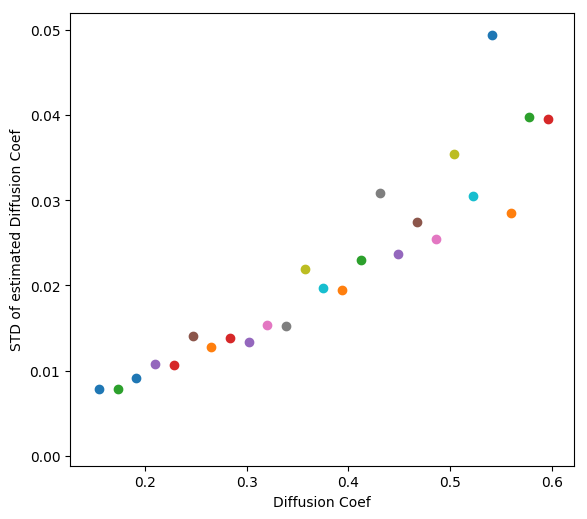

In [7]:
for key, values in results2.items():
    if .15 < key < .6:
        vec = np.ones(len(values))
        values = np.array(values)
#         plt.scatter(key*vec, values.T[0])
        plt.scatter(key, np.std(values.T[0]))
plt.xlabel("Diffusion Coef")
plt.ylabel("STD of estimated Diffusion Coef")

In [8]:
slow_params = read_parameters("./setups/parameters_quick_slow_diffusion.json")
number_of_molecules = range(30, 300,10)
results3 = {k:[] for k in number_of_molecules}
results3_graphs = {k:[] for k in number_of_molecules}
from itertools import product

for num,_ in tqdm(list(product(number_of_molecules, range(50)))):
    slow_params['number_of_molecules'] = num
    mid = Simulation(medium_params)
    slow = Simulation(slow_params)
    mid.run(verbose = False)
    slow.run(verbose = False)
    two_species = TwoSpeciesSimulation(mid, slow)
    try:
        args, [X, Y, aY] = two_species.approxiamte_diffusion_coefficients(5,
                                    bins = 200, p0 = [.5,2,2])
        results3[num].append(args)
        results3_graphs[num].append([X,Y,aY])
    except RuntimeError:
        print("err")
        pass
#     plt.bar(X,Y, width = .0002)
#     plt.plot(X, aY, '*')
    

HBox(children=(IntProgress(value=0, max=1350), HTML(value='')))

Text(0, 0.5, 'STD^-2 of estimated Diffusion Coef')

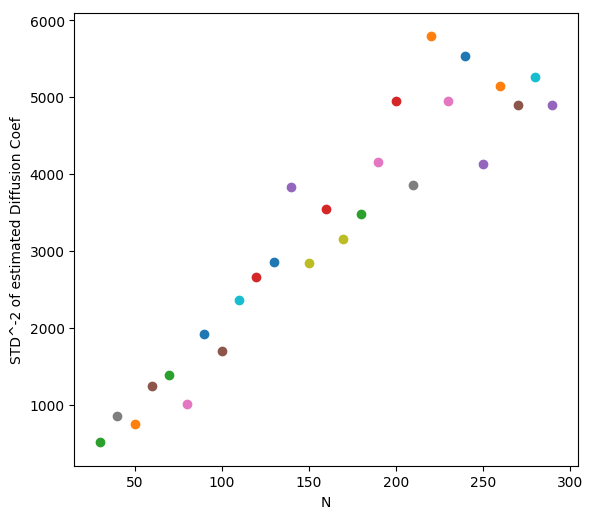

In [9]:
for key, values in results3.items():
#     if key < .75:
    vec = np.ones(len(values))
    values = np.array(values)
#         plt.scatter(key*vec, values.T[0])
    plt.scatter(key, np.std(values.T[0])**(-2))
plt.xlabel("N")
plt.ylabel("STD^-2 of estimated Diffusion Coef")

In [135]:
slow_params = read_parameters("./setups/parameters_quick_slow_diffusion.json")
number_of_molecules = list(map(int,np.logspace(1,3,30)) )
results4 = {k:[] for k in number_of_molecules}
results4_graphs = {k:[] for k in number_of_molecules}
from itertools import product

for num,_ in tqdm(list(product(number_of_molecules, range(50)))):
    slow_params['number_of_molecules'] = num
    mid = Simulation(medium_params)
    slow = Simulation(slow_params)
    mid.run(verbose = False)
    slow.run(verbose = False)
    two_species = TwoSpeciesSimulation(mid, slow)
    try:
        args, [X, Y, aY] = two_species.approxiamte_diffusion_coefficients(5,
                                    bins = 200, p0 = [.5,2,2])
        results4[num].append(args)
        results4_graphs[num].append([X,Y,aY])
    except RuntimeError:
        print("err")
        pass
#     plt.bar(X,Y, width = .0002)
#     plt.plot(X, aY, '*')
    

HBox(children=(IntProgress(value=0, max=1500), HTML(value='')))

KeyboardInterrupt: 

IndexError: index 0 is out of bounds for axis 0 with size 0

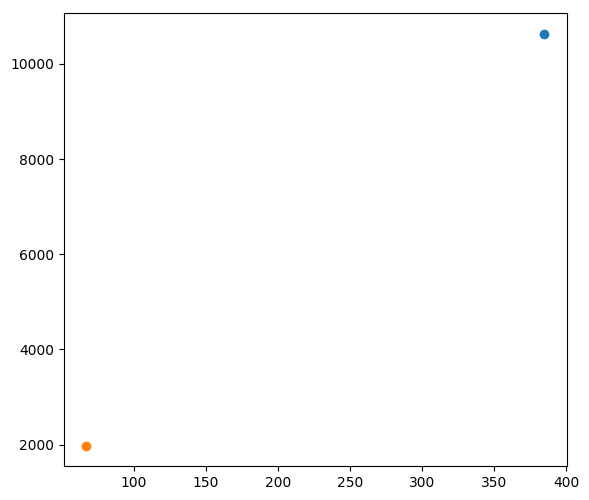

In [142]:
for key, values in results4.items():
#     if key < .75:
    vec = np.ones(len(values))
    values = np.array(values)
#         plt.scatter(key*vec, values.T[0])
    plt.scatter(key, np.std(values.T[0])**(-2))

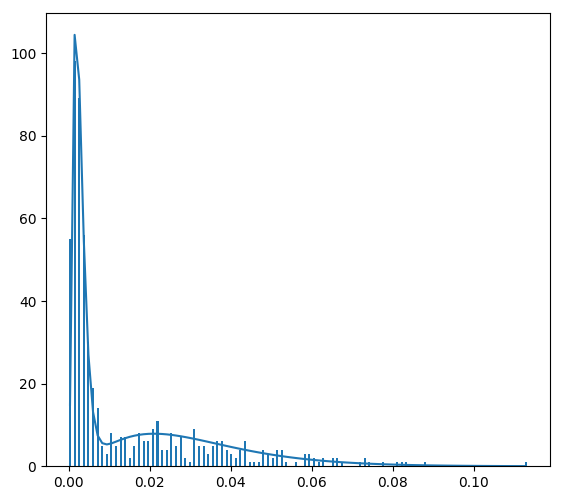

In [141]:
args, [X, Y, aY] = two_species.approxiamte_diffusion_coefficients(4,
                                    bins = 100, p0 = [.2,2,.1])
plt.bar(X,Y, .0005)
plt.plot(X,aY)

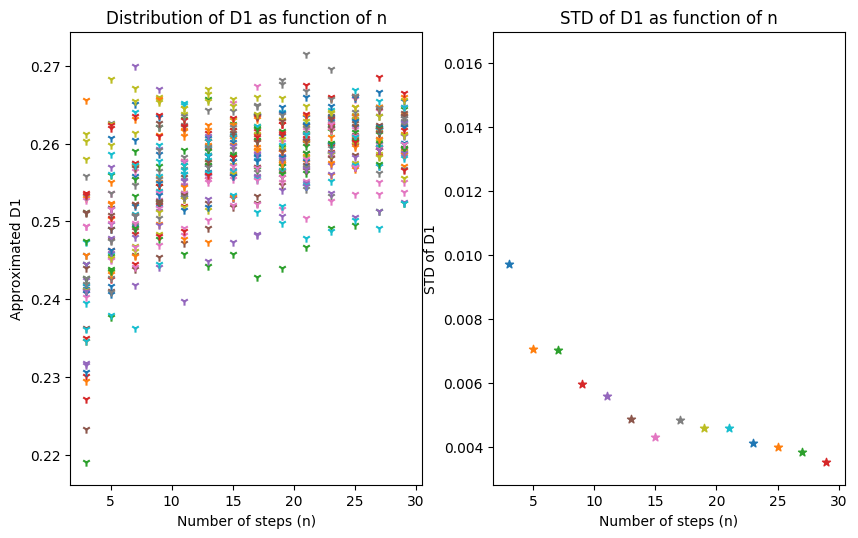

In [26]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sigmas = []
for key, args in results2.items():
    for arg in args:
        plt.scatter([key], arg[0], marker ='1')
plt.title("Distribution of D1 as function of n")
plt.xlabel("Number of steps (n)")
plt.ylabel("Approximated D1")
plt.subplot(1,2,2)
plt.title("STD of D1 as function of n")
plt.xlabel("Number of steps (n)")
plt.ylabel("STD of D1")
        
for key in results2:
    plt.scatter([key], np.std(results2[key], axis=0)[0],
                marker = '*')

#

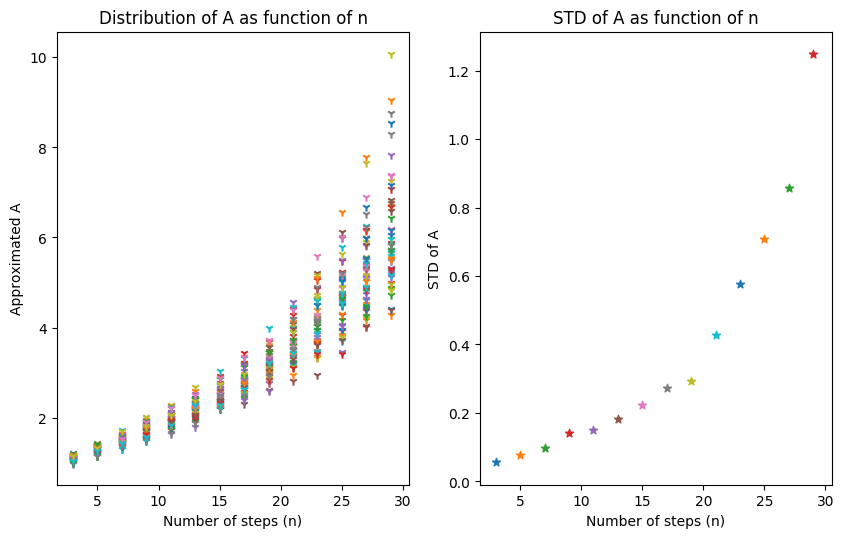

In [27]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sigmas = []
for key, args in results2.items():
    for arg in args:
        plt.scatter([key], arg[2], marker ='1')
plt.title("Distribution of A as function of n")
plt.xlabel("Number of steps (n)")
plt.ylabel("Approximated A")
plt.subplot(1,2,2)
plt.title("STD of A as function of n")
plt.xlabel("Number of steps (n)")
plt.ylabel("STD of A")
        
for key in results2:
    plt.scatter([key], np.std(results2[key], axis=0)[2],
                marker = '*')

#

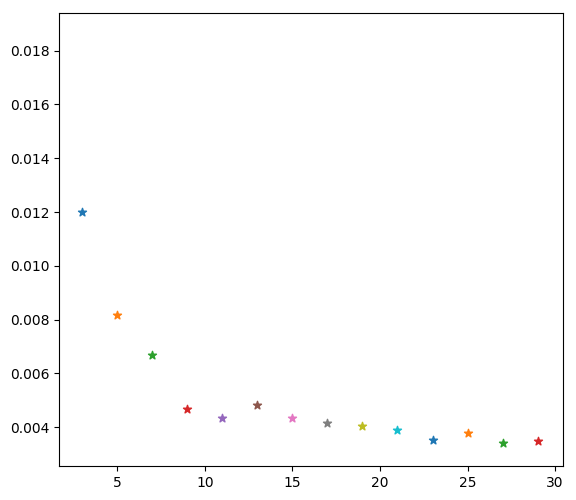

In [124]:

#     plt.scatter([key], np.mean(results2[key], axis=0)[0])

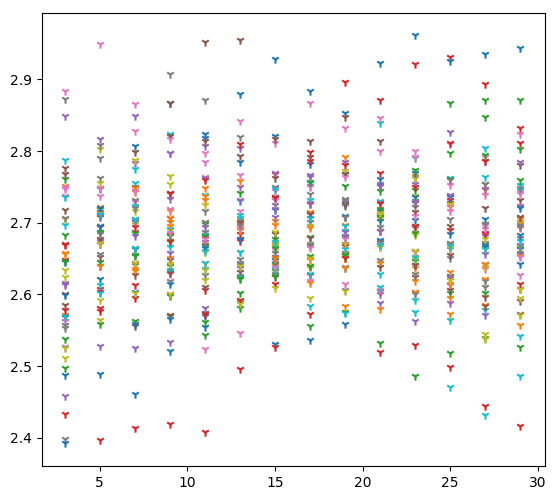

In [35]:
for key, args in results2.items():
    for arg in args:
        plt.scatter([key], arg[1],marker='1')

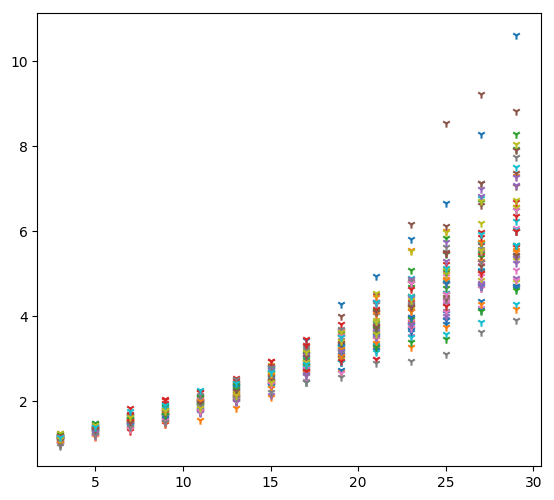

In [36]:
for key, args in results2.items():
    for arg in args:
        plt.scatter([key], arg[2], marker='1')
plt.xlabel("Number of steps (n)")
plt.ylabel("Distribution of A")

Text(0.5, 1.0, 'Example of a single simulated path projected to 2D')

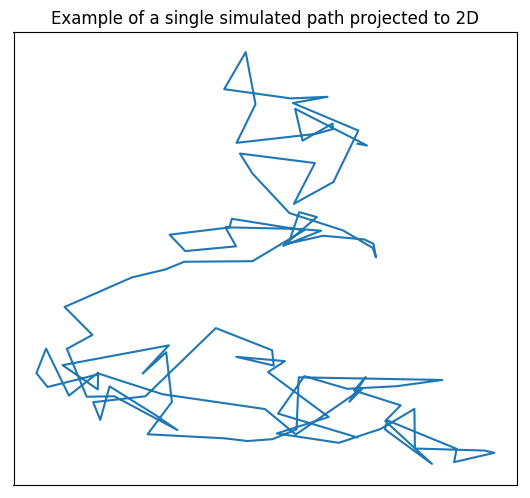

In [51]:
max(mid.molecules, key=lambda x:x.get_length_of_journey()).plot()
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([])
plt.title("Example of a single simulated path projected to 2D")

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

Text(0, 0.5, 'Mean Square Displacement')

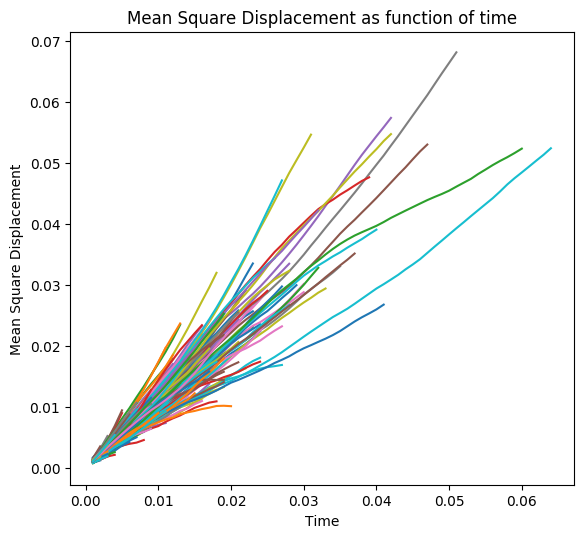

In [55]:
slow.plot_mean_square_displacement_curves()
plt.title("Mean Square Displacement as function of time")
plt.xlabel("Time")
plt.ylabel("Mean Square Displacement")

809
635


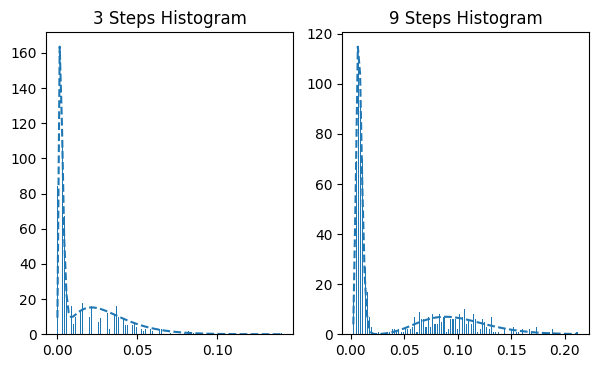

In [31]:
plt.figure(figsize=(7,4))
args, [X, Y, aY] = two_species.approxiamte_diffusion_coefficients(4,
                                    bins = 100, p0 = [.2,2,.1])
plt.subplot(1,2,1)
print(sum(Y))
plt.title("3 Steps Histogram")
plt.bar(X,Y, .0004,align='edge')
plt.plot(X,aY, '--')
plt.subplot(1,2,2)
plt.title("9 Steps Histogram")
args2, [X, Y, aY] = two_species.approxiamte_diffusion_coefficients(10,
                                    bins = 100, p0 = [.2,2,.1])
print(sum(Y))
plt.bar(X,Y, .001,align='edge')
plt.plot(X,aY, '--')

In [99]:
slow.step_time_in_seconds

0.001

In [95]:
print(args, args2)

[0.22459971 2.70750581 1.02475333] [0.24420256 2.67300071 1.69677219]


In [100]:
mid.approximate_diffusion_ceofficient()

Approximation : 2.6557516848708733
Value : 2.7
Ratio : 0.9836117351373604


2.6557516848708733

### Fisher Information

HBox(children=(IntProgress(value=0, max=1500), HTML(value='')))

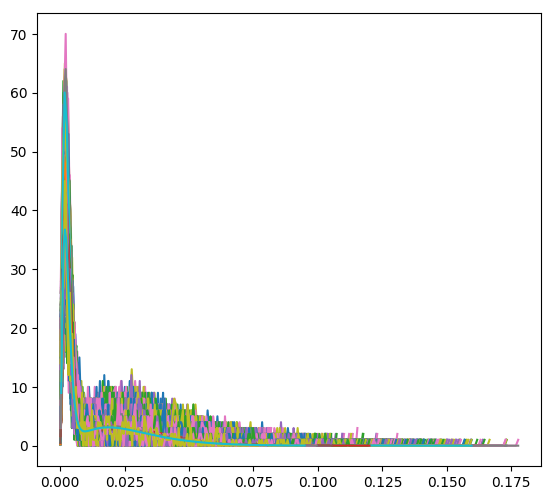

In [85]:
diffusion_range = np.logspace(-1,0)
results_FI = {k:[] for k in diffusion_range}
from itertools import product
# for _ in tqdm(range(50)):
for _, slow_diff_coef in tqdm(list(product(range(30), diffusion_range))):
    mid = Simulation(read_parameters("./setups/parameters_quick_medium_diffusion.json"))
    slow = Simulation(read_parameters("./setups/parameters_quick_slow_diffusion.json"))
    mid.diffusion_coefficient = 12
    mid.run(verbose = False)
    slow.diffusion_coefficient = slow_diff_coef
    slow.run(verbose = False)
    two_species = TwoSpeciesSimulation(mid, slow)

    args, [X, Y, aY] = two_species.approxiamte_diffusion_coefficients(4,
                                    bins = 200, p0 = [3,.5,10])
    plt.plot(X,Y)
    plt.plot(X,aY)
    results_FI[slow_diff_coef].append(args)


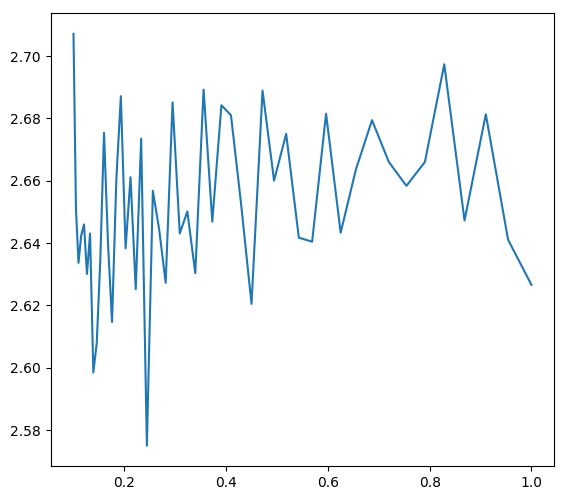

In [93]:
X = sorted(results_FI.keys())
Y = np.array([np.mean(results_FI[x], axis=0) for x in X]).T
    
plt.plot(X, Y[0])